# 3. Feladatsor: megoldások
*(Normálegyenlet, iteratív megoldók, gradiens-ereszkedés)*

### Hogyan készíthetünk ilyen fixpont-iterációt I.

Legegyszerűbb megközelités (egyszerű- vagy **Richardson-iteráció**)
$$
\begin{align}
Ax &= b\\
0 &= b - Ax \\
x &= x - Ax + b \\
\\
f(x) &= (I-A)x +b
\end{align}
$$

Egy gond ezzel, hogy sokszor az $I-A$ mátrix spektrálsugara még nem elég kicsi. Ezen segithetünk egy $\omega$ paraméter bevezetésével:
$$
\begin{align}
Ax &= b\\
0 &= \omega(b - Ax) \\
x &= x - \omega Ax + \omega b \\
\\
f_{\omega}(x) &= (I-\omega A)x +\omega b
\end{align}
$$

Itt $\rho(I-\omega A) < 1$ pontosan akkor teljesül, ha az $A$ mátrix $\lambda$ sajátértékeire $| 1 - \omega \lambda | < 1$. A konvergencia akkor a leggyorsabb, ha ez a spektrálsugár minél kisebb. Például ha az $A$ mátrix szimmetrikus és pozitiv definit akkor az optimális választás $\omega$-ra: 

$$\omega_{\text{opt}} = \frac{2}{\lambda_{\min} + \lambda_{\max}}.$$

### 2. Feladat

Miért ez az $\omega_{\text{opt}}$?

Megoldás: $\rho(I-\omega A)=\max\{|1-\omega \lambda_{\min}|,|1-\omega \lambda_{\max}|\}$ SZPD $A$ esetén, ezt az értéket szeretnénk minimalizálni. $\omega_{\text{opt}} = \frac{2}{\lambda_{\min} + \lambda_{\max}}$ esetén ezek

$$|1-\omega_{\text{opt}} \lambda_{\min}|=\bigg|1- \dfrac{2\lambda_{\min}}{\lambda_{\min}+\lambda_{\max}}\bigg|=\bigg|\dfrac{\lambda_{\max}-\lambda_{\min}}{\lambda_{\min}+\lambda_{\max}}\bigg|=\bigg|\dfrac{\lambda_{\min}-\lambda_{\max}}{\lambda_{\min}+\lambda_{\max}}\bigg|=\bigg|1- \dfrac{2\lambda_{\max}}{\lambda_{\min}+\lambda_{\max}}\bigg|=|1-\omega_{\text{opt}} \lambda_{\max}|,$$

azaz a 2 érték megegyezik, és egyszerűen látható, hogy itt lesz minimális a kettő maximuma.

### P1. Feladat
Írjunk programot, amely egy $A$ SZPD mátrix esetén egy ábrán ábrázolja az $I-\omega A$ mátrix sajátértékeinek abszolútértékét az $\omega$ függvényeként. Bemeneti paraméterek lehetnek a mátrix sajátértékei.

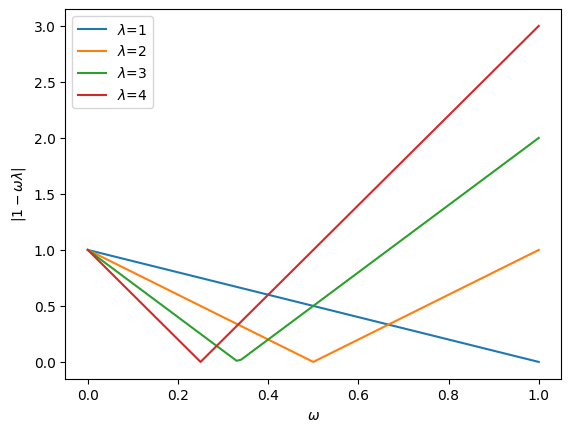

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def vplot(*lambdas: float, omega_min: float = 0., omega_max: float = 1.):
    assert len(lambdas) >= 1
    assert omega_max > omega_min
    
    ax = plt.axes()
    
    omegas = np.linspace(omega_min, omega_max, int(101*abs(omega_max - omega_min)))
    for lam in lambdas:
        ax.plot(omegas,  abs(1 - omegas*lam), label=fr"$\lambda$={lam}")

    ax.legend()
    ax.set_xlabel(r"$\omega$")
    ax.set_ylabel(r"$|1-\omega\lambda|$")

vplot(1,2,3,4)

### P2. Feladat
Írjunk általános függvényt a fenti, $A = M-N$ felbontással adódó iterációkhoz, majd ezzel implementáljuk a tanult iterációkat.

Alkalmazzunk is ezek közül egy olyat, amit értelmes az
$$
\left[\matrix{2 & -1 \cr -1 & 2}\right] x= \left[ \matrix{1 \cr 3} \right]
$$
egyenlet megoldására. Addig iteráljunk, míg két szomszédos iterált $\| \cdot \|_2$ szerinti távolsága $10^{-4}$ alá nem csökken.

In [35]:
A = np.array([
    [2, -1],
    [-1, 2],
])

b = np.array([1, 3])
x=np.linalg.solve(A,b)
x0 = np.zeros((2,))
print(x)

[1.66666667 2.33333333]


In [36]:
def Jacobi_iteration(A, b, x0, omega=1, atol=1e-6, max_step=1000):
    M=1/omega*np.diag(np.diag(A))
    N=M-A
    # B=M^{-1}N
    B=np.linalg.solve(M,N)
    # r=M^{-1}b
    r=np.linalg.solve(M,b)
    itnum=0
    is_success=False
    x=x0
    for step_num in range(1,max_step+1):
        d=B@x+r-x;
        x=x+d

        # ha d kicsi, akkor x_n+1-x_n kicsim azaz közel vagyunk a fixponthoz
        abs_err=np.linalg.norm(d)
        itnum=itnum+1
        if abs_err<=atol:
            is_success=True
            break
        
    
    return x,itnum,is_success,M,N

Jacobi_iteration(A,b,x0)

(array([1.66666627, 2.33333278]),
 22,
 True,
 array([[2., 0.],
        [0., 2.]]),
 array([[0., 1.],
        [1., 0.]]))

In [34]:
A = np.array([
    [2, -4],
    [-3, 2],
])

b = np.array([1, 3])
x=np.linalg.solve(A,b)
x0 = np.zeros((2,))

Jacobi_iteration(A,b,x0)

(array([6.36305106e+238, 4.09053283e+238]),
 1000,
 False,
 array([[2., 0.],
        [0., 2.]]),
 array([[0., 4.],
        [3., 0.]]))

In [37]:
def GS_iteration(A, b, x0, omega=1, atol=1e-6, max_step=1000):
    M=1/omega*np.diag(np.diag(A))+np.tril(A,-1)
    N=M-A
    # B=M^{-1}N
    B=np.linalg.solve(M,N)
    # r=M^{-1}b
    r=np.linalg.solve(M,b)
    itnum=0
    is_success=False
    x=x0
    for step_num in range(1,max_step+1):
        d=B@x+r-x;
        x=x+d

        # ha d kicsi, akkor x_n+1-x_n kicsim azaz közel vagyunk a fixponthoz
        abs_err=np.linalg.norm(d)
        itnum=itnum+1
        if abs_err<=atol:
            is_success=True
            break

    return x,itnum,is_success,M,N
    
    


GS_iteration(A,b,x0)

(array([1.66666639, 2.33333319]),
 12,
 True,
 array([[ 2.,  0.],
        [-1.,  2.]]),
 array([[0., 1.],
        [0., 0.]]))

In [38]:
A = np.array([
    [2, -1],
    [0, 2],
])

b = np.array([1, 3])
x=np.linalg.solve(A,b)
x0 = np.zeros((2,))

GS_iteration(A,b,x0)

(array([1.25, 1.5 ]),
 3,
 True,
 array([[2., 0.],
        [0., 2.]]),
 array([[0., 1.],
        [0., 0.]]))

### P3. Feladat

Implementáljuk a gradiens-módszert az optimális lépéshosszválasztással az SZPD-baloldalú lineáris egyenletrendszer iteratív megoldására.

Alkalmazzuk is ezt a módszert az 
$$
\left[\matrix{2 & -1 \cr -1 & 2}\right] x= \left[ \matrix{1 \cr 3} \right]
$$
egyenlet megoldására. Addig iteráljunk, míg két szomszédos iterált $\| \cdot \|_\infty$ szerinti távolsága $10^{-6}$ alá nem csökken.

In [2]:
import numpy as np

def gradient_descent(A, b, x0, tol=1e-6, max_iter=1000):
    ...

# Example usage: (nem szimmetrikus mátrix esetén a normálegyenlettel használható a gradiens ereszkedés : A^T*A*x=A^T*b megoldása megegyezik az A*x=b megoldásával, ha A invertálható)
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])
b = np.array([5, -6, 6])
x0 = np.zeros_like(b)

solution, iterations, is_success = gradient_descent(A.T@A, A.T@b, x0)
print("Solution:", solution)
print("Number of iterations:", iterations)
print("Success:", is_success)
print(A@solution)

Solution: [ 2.24999884 -0.50000156  2.74999884]
Number of iterations: 223
Success: True
[ 4.99999925 -6.00000081  5.99999925]
